In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
spreadsheet = pd.ExcelFile('Dataset/dataset.xlsx')
df2 = spreadsheet.parse('Sheet1')
df2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(ha),Production(tonnes),Avg_Prep(mm),Avg_temp(C),Yield(tonnes/ha)
0,Maharashtra,AHMEDNAGAR,1997.0,Kharif,Arhar/Tur,17600.0,6300.0,136.30175,25.65,0.357955
1,Maharashtra,AHMEDNAGAR,1997.0,Kharif,Bajra,274100.0,152800.0,136.30175,25.65,0.557461
2,Maharashtra,AHMEDNAGAR,1997.0,Kharif,Gram,40800.0,18600.0,136.30175,25.65,0.455882
3,Maharashtra,AHMEDNAGAR,1997.0,Kharif,Jowar,900.0,1100.0,136.30175,25.65,1.222222
4,Maharashtra,AHMEDNAGAR,1997.0,Kharif,Maize,4400.0,4700.0,136.30175,25.65,1.068182


In [2]:
ar = []
ar2d = []

x_list=[]
z_list=[]
i=0
y_list=[]
for row in df2.itertuples():
    if row[5]=='Bajra':
        ar.append(row[8])
        x_list.append(row[8])
        ar.append(row[9])
        z_list.append(row[9])
        y_list.append(row[10])
        ar2d.append(ar)
        ar = []
    i=i+1
nar2d = np.array(ar2d)
ny = np.array(y_list)


X_train = nar2d[:-4]
X_test = nar2d[-4:]

y_train = ny[:-4]
y_test = ny[-4:]

'''
print(X_train)
print(X_test)
print(y_train)
'''
print(y_test)


# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
line_y = lr.predict(X_test)
print("Linear regression prediction")
print(line_y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_y_ransac = ransac.predict(X_test)
print("ransac prediction")
print(line_y_ransac)
# Compare estimated coefficients
print("Estimated coefficients (linear regression, RANSAC):")
print(lr.coef_, ransac.estimator_.coef_)

# The mean squared error
print("Mean squared error of linear regression: %.2f"
      % mean_squared_error(y_test, line_y))
print("Mean squared error of ramsac regression: %.2f"
      % mean_squared_error(y_test, line_y_ransac))
# Explained variance score: 1 is perfect prediction
print('Variance score of linear regr: %.2f' % r2_score(y_test, line_y))
print('Variance score of ransac: %.2f' % r2_score(y_test, line_y_ransac))

[0.51162791 0.63043478 0.36486486 0.625     ]
Linear regression prediction
[0.69063777 0.65273019 0.61980831 0.63962508]
ransac prediction
[0.5680667  0.44840629 0.42824636 0.4962887 ]
Estimated coefficients (linear regression, RANSAC):
[0.00073144 0.00488984] [ 0.00066496 -0.09575812]
Mean squared error of linear regression: 0.02
Mean squared error of ramsac regression: 0.01
Variance score of linear regr: -1.09
Variance score of ransac: -0.22


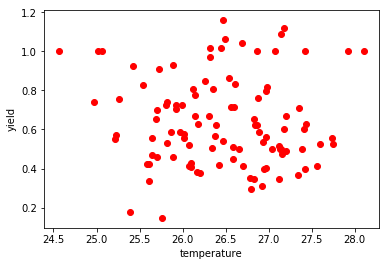

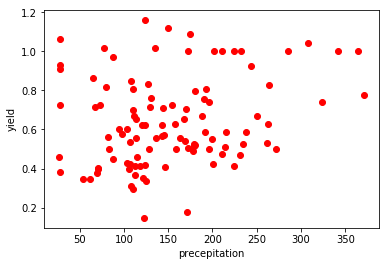

In [3]:
i=0
x_list=[]
y_list=[]
x2_list = []
x3_list = []
for row in df2.itertuples():
    if row[5]=='Bajra':
        x_list.append(row[9])
        x2_list.append(row[8])
        x3_list.append(row[10])
        y_list.append(row[3])
    i=i+1
plt.figure(1)
#plt.subplot(211)
plt.plot(x_list,x3_list,'ro')
plt.xlabel('temperature')
plt.ylabel('yield')
plt.show()
#plt.subplot(211)
plt.plot(x2_list,x3_list,'ro')
plt.xlabel('precepitation')
plt.ylabel('yield')
plt.show()